# Load necessary libraries

In [1]:
import os 
# https://musicinformationretrieval.com/ipython_audio.html
import librosa 
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import sounddevice as sd
import soundfile as sf

# Exploratry Data Analysis

In [2]:
DIRECTORY = 'C:\\Users\\UPES\\Pictures\\Audio_Speech_analysis\\data\\speech_recognition\\house\\'
#load the file
#set sampling rate to 16KHz
samples, sample_rate = librosa.load(DIRECTORY+'0ab3b47d_nohash_0.wav', sr = 16000)
print(samples.shape)
print(sample_rate)

(16000,)
16000


In [3]:
#play audio
ipd.Audio(DIRECTORY+'0ab3b47d_nohash_0.wav')

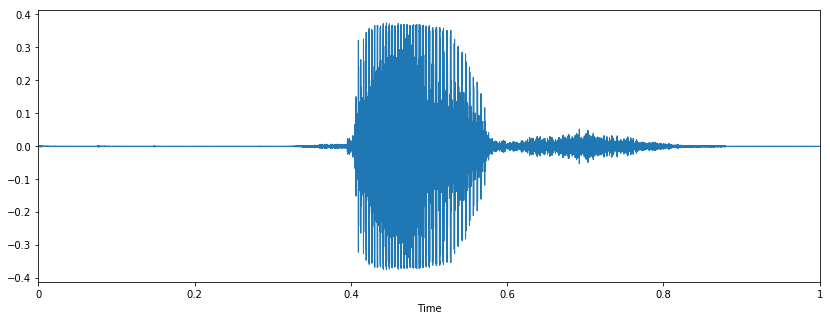

In [89]:
#plot raw wave with librosa
plt.figure(figsize = (14, 5))
librosa.display.waveplot(samples, sr = sample_rate)

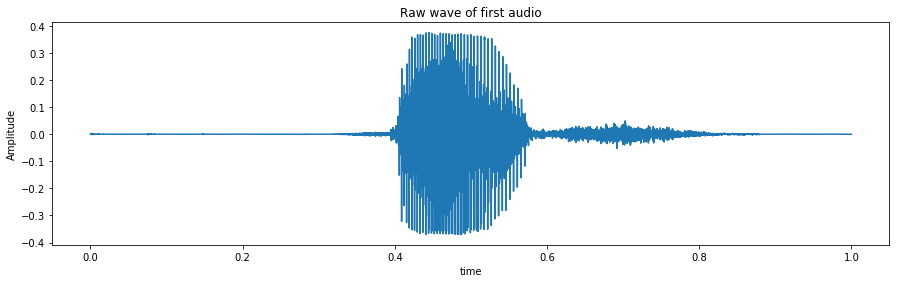

In [90]:
# Mark lables with matplotlib
fig = plt.figure(figsize = (15, 9))
ax1 = fig.add_subplot(211)
#plot raw wave
ax1.set_title('Raw wave of first audio')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

Note : The numpy array we get is basically an array with each number representing the sound wave’s amplitude at 1/16,000th of a second intervals.

# Record your own voice for data

In [96]:
#record using sounddevice
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write
#set sample rate
sr = 22000
sec = 1
myaudio = sd.rec(int(sec*sr), samplerate = sr, channels = 2)
sd.wait()
write('hello3.wav', sr, myaudio)
print("----Recording done----")


----Recording done----


(22050,)
22050


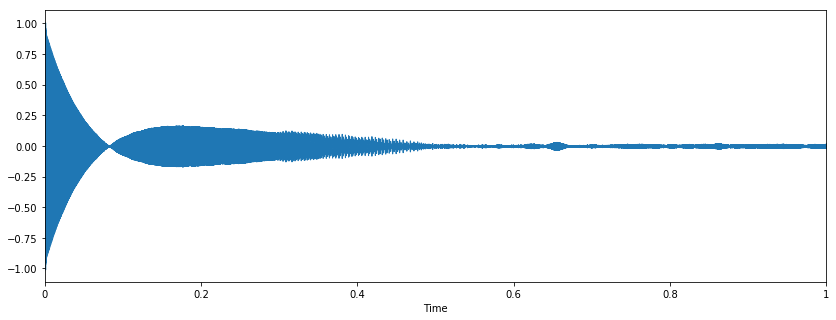

In [97]:
#load, play and plot audio
sample, sample_rate = librosa.load('hello3.wav')
#sample = length of audio array
print(sample.shape)
print(sample_rate)

# raw plot
plt.figure(figsize = (14,5))
librosa.display.waveplot(sample,sr = sample_rate)

In [98]:
#play
workspace = 'C:\\Users\\UPES\\Pictures\\Audio_Speech_analysis\\codes\\hello3.wav'
data, s_rate = sf.read(workspace, dtype = 'float32')
sd.play(data, s_rate)
sd.wait()

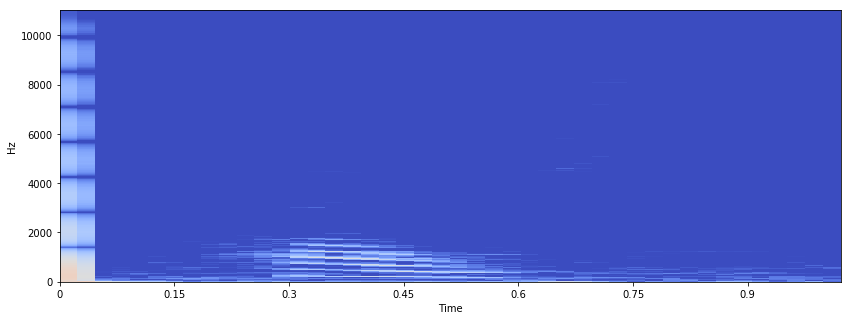

In [99]:
#Spectogram
x = librosa.stft(sample)
#convert amplitude to decibels
spect = librosa.amplitude_to_db(abs(x))
plt.figure(figsize = (14,5))
librosa.display.specshow(spect,sr = sample_rate, x_axis = 'time', y_axis = 'hz')

# Sample rate conversion(Resampling)
 * reducing the sampling rate, or downsampling
 * Avoid processing unnecessary bandwidth.
 * Bsically has two operations:
    1. Interpolation - Increasing the sample rate.
    2. Decimation - Decreasing the sample rate.

   #               Decimation       

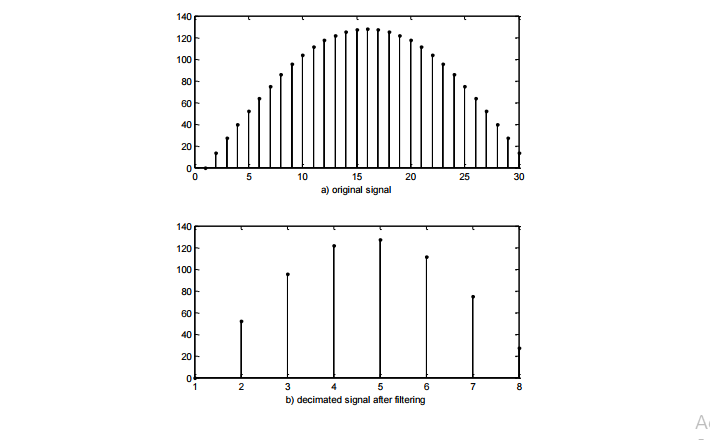

In [100]:
samples = librosa.resample(sample, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

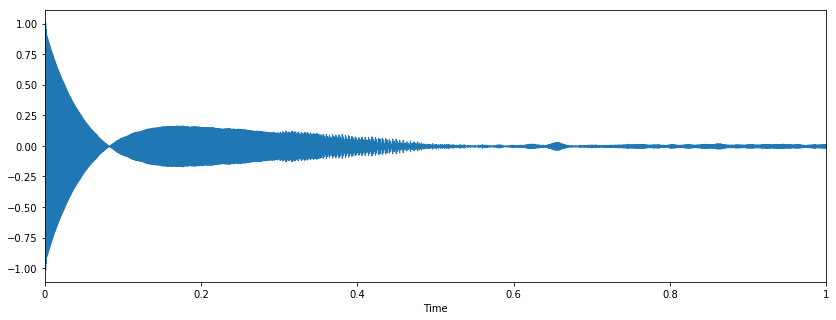

In [101]:
#plot the resampled audio
plt.figure(figsize = (14,5))
librosa.display.waveplot(samples,sr = 8000)

In [107]:
sample_aray = np.array(samples)

In [108]:
sample_aray[0]

0.014247439

In [113]:
len(sample_aray)

8000

In [2]:
# no of labels and count of each label
count_of_recordings = []
DATA = 'C:\\Users\\UPES\\Pictures\\Audio_Speech_analysis\\data\\speech_recognition\\'
labels = ['bed','bird','cat','dog','down','eight','five','four', 'happy','house']
for label in labels:
    #enter the folder
    recordings = [f for f in os.listdir(DATA+ label) if f.endswith('.wav')]
    count_of_recordings.append(len(recordings))
print(len(count_of_recordings))

10


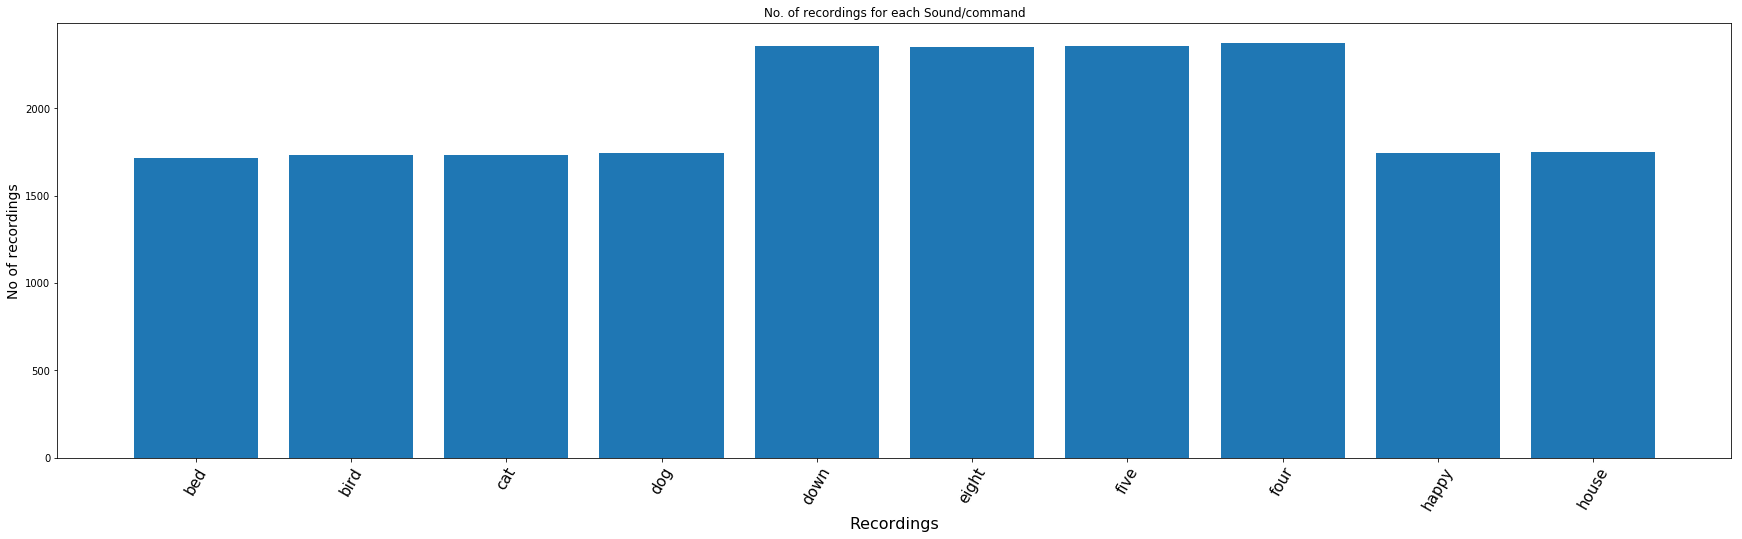

In [3]:
plt.figure(figsize=(30,8))
index = np.arange(len(labels))
plt.bar(index, count_of_recordings)
plt.xlabel('Recordings', fontsize=16)
plt.ylabel('No of recordings', fontsize=14)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each Sound/command')
plt.show()

In [4]:
# Duration of each recording
duration = []
for label in labels:
    #enter the folder
    path = os.path.join(DATA,label)
    record = [f for f in os.listdir(path) if f.endswith('.wav')]
    print(path)
    print(record)
    break

C:\Users\UPES\Pictures\Audio_Speech_analysis\data\speech_recognition\bed
['00176480_nohash_0.wav', '004ae714_nohash_0.wav', '004ae714_nohash_1.wav', '00f0204f_nohash_0.wav', '00f0204f_nohash_1.wav', '012c8314_nohash_0.wav', '012c8314_nohash_1.wav', '0132a06d_nohash_0.wav', '0135f3f2_nohash_0.wav', '0137b3f4_nohash_0.wav', '014f9f65_nohash_0.wav', '01648c51_nohash_0.wav', '01648c51_nohash_1.wav', '016e2c6d_nohash_0.wav', '01b4757a_nohash_0.wav', '01b4757a_nohash_1.wav', '01bcfc0c_nohash_0.wav', '0227998e_nohash_0.wav', '026290a7_nohash_0.wav', '02746d24_nohash_0.wav', '035de8fe_nohash_0.wav', '0362539c_nohash_0.wav', '0362539c_nohash_1.wav', '037c445a_nohash_0.wav', '0397ecda_nohash_0.wav', '03c96658_nohash_0.wav', '042186b8_nohash_0.wav', '042ea76c_nohash_0.wav', '0447d7c1_nohash_0.wav', '0474c92a_nohash_0.wav', '0474c92a_nohash_1.wav', '05739450_nohash_0.wav', '05b2db80_nohash_0.wav', '05d18852_nohash_0.wav', '06076b6b_nohash_0.wav', '060cd039_nohash_0.wav', '060cd039_nohash_1.wav', '

(array([2.0000e+00, 6.0000e+00, 5.6000e+01, 4.3000e+01, 1.2500e+02,
        1.9900e+02, 3.0700e+02, 2.6800e+02, 4.6600e+02, 1.8383e+04]),
 array([0.384 , 0.4456, 0.5072, 0.5688, 0.6304, 0.692 , 0.7536, 0.8152,
        0.8768, 0.9384, 1.    ]),
 <a list of 10 Patch objects>)

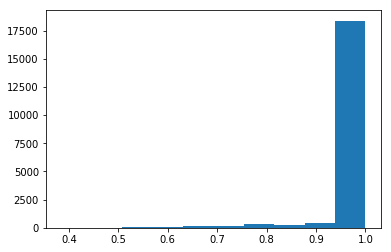

In [5]:
for label in labels:
    #enter the folder
    path = os.path.join(DATA,label)
    record = [f for f in os.listdir(path) if f.endswith('.wav')]
    #read each file
    for file in record:
     
        file_path = path+'\\'+file
        data, sample_rate = sf.read(file_path, dtype = 'float32')
        duration.append(float(len(data)/sample_rate))
duration_array = np.array(duration)
plt.hist(duration_array)

# Data Preprocessing

In [6]:
X = []
Y = []
for label in labels:
    #enter the folder
    path = os.path.join(DATA,label)
    record = [f for f in os.listdir(path) if f.endswith('.wav')]
    #read each file
    for file in record:
        file_path = path+'\\'+file
        samples, sample_rate = librosa.load(file_path, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            X.append(samples)
            Y.append(label)

# Label encoding
      as it is a multiclassification problem with 10 features

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)
classes= list(le.classes_)

In [21]:
import tensorflow as tf
import keras
from keras.utils import np_utils
y=np_utils.to_categorical(y,num_classes=len(labels))

In [22]:
y.shape

(17758, 10)

In [24]:
y[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
#we were working with 2D array but for convolution we need 3D array
#lets reshape it
X = np.array(X).reshape(-1,8000,1)

# Split into train and test sets

In [26]:
from sklearn.model_selection import train_test_split
x = np.array(X)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 777, shuffle = True)

# Build model

In [30]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from tensorflow.keras.models import Model
#from keras import backend as K

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxP

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
fitted_model = model.fit(x_train, y_train ,epochs=10,batch_size=32, validation_data=(x_test,y_test))

Train on 14206 samples, validate on 3552 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 3872/14206 [=======>......................] - ETA: 9:39 - loss: 2.2858 - acc: 0.1240

In [ ]:
# plot diagnostic plot
plt.plot(fitted_model['loss'], label = 'train')
plt.plot(fitted_model['val_loss'], label = 'test')
plt.legend()
plt.show()

# Prediction time

In [ ]:
def predict_audio(audio):
    pred = model.predict(audio.reshape(1,8000,1))
    res = np.argmax(pred[0])
    return classes[res]

# Predict on test data

In [ ]:
index = random.randint(0, len(x_test)-1)
# randomly select a value to test against
test_sample = x_test[index].ravel()
#play
ipd.Audio(test_sample)
print("Text: ")
predict(test_sample)

In [ ]:
# Use your own voice that we recorded above (hello3.wav)
sample, sample_rate = librosa.load('hello3.wav')
sample = librosa.resample(sample, sample_rate = 8000)
ipd.Audio(sample, rate = 8000)
predict(sample)